In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import noise

###### Modo basico

Existe una unica fuente de captacion de agua y es en 2D

Tiempo en la primera pendiente: 4.74 segundos
Tiempo en el plano: 9.00 segundos
Tiempo en la segunda pendiente: 3.35 segundos
Tiempo total hasta el estanque: 17.10 segundos


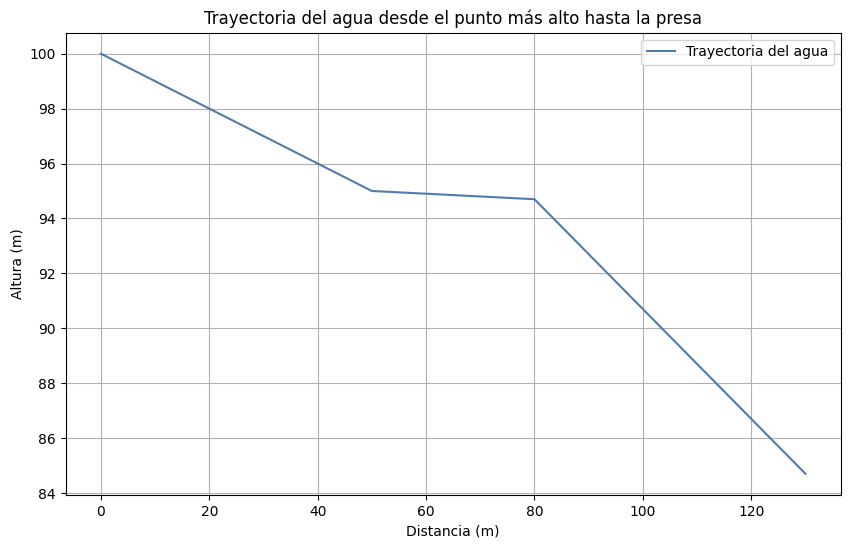

In [2]:
# Constantes
g = 9.81  # m/s^2, gravedad
n = 0.03  # Coeficiente de rugosidad de Manning

# Parámetros de las pendientes y plano
longitud_pendiente1 = 50  # metros
inclinacion_pendiente1 = 0.1  # relación de la pendiente
longitud_plano = 30  # metros
inclinacion_plano = 0.01  # relación de la pendiente
longitud_pendiente2 = 50  # metros
inclinacion_pendiente2 = 0.2  # relación de la pendiente

# Alturas iniciales
altura_inicial = 100  # metros, por ejemplo

# Calcular alturas finales de cada tramo
altura_pendiente1 = altura_inicial - longitud_pendiente1 * inclinacion_pendiente1
altura_plano = altura_pendiente1 - longitud_plano * inclinacion_plano
altura_pendiente2 = altura_plano - longitud_pendiente2 * inclinacion_pendiente2

# Radio hidráulico (asumido constante para simplificación)
R = 1  # metros

def velocidad_manning(S, R, n):
    return (1/n) * R**(2/3) * S**(1/2)

# Velocidades en cada sección
v_pendiente1 = velocidad_manning(inclinacion_pendiente1, R, n)
v_plano = velocidad_manning(inclinacion_plano, R, n)
v_pendiente2 = velocidad_manning(inclinacion_pendiente2, R, n)

# Tiempos de viaje en cada sección
t_pendiente1 = longitud_pendiente1 / v_pendiente1
t_plano = longitud_plano / v_plano
t_pendiente2 = longitud_pendiente2 / v_pendiente2

# Tiempo total
tiempo_total = t_pendiente1 + t_plano + t_pendiente2

# Resultados
print(f"Tiempo en la primera pendiente: {t_pendiente1:.2f} segundos")
print(f"Tiempo en el plano: {t_plano:.2f} segundos")
print(f"Tiempo en la segunda pendiente: {t_pendiente2:.2f} segundos")
print(f"Tiempo total hasta el estanque: {tiempo_total:.2f} segundos")

# Gráfico de la trayectoria
distancia_total = longitud_pendiente1 + longitud_plano + longitud_pendiente2

# Crear los puntos para cada sección
x_pendiente1 = np.linspace(0, longitud_pendiente1, 100)
y_pendiente1 = altura_inicial - inclinacion_pendiente1 * x_pendiente1

x_plano = np.linspace(longitud_pendiente1, longitud_pendiente1 + longitud_plano, 100)
y_plano = altura_pendiente1 - inclinacion_plano * (x_plano - longitud_pendiente1)

x_pendiente2 = np.linspace(longitud_pendiente1 + longitud_plano, distancia_total, 100)
y_pendiente2 = altura_plano - inclinacion_pendiente2 * (x_pendiente2 - (longitud_pendiente1 + longitud_plano))

# Combinar los puntos
x_total = np.concatenate([x_pendiente1, x_plano, x_pendiente2])
y_total = np.concatenate([y_pendiente1, y_plano, y_pendiente2])

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(x_total, y_total, label='Trayectoria del agua', color='#4F7CAC')
plt.xlabel('Distancia (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria del agua desde el punto más alto hasta la presa')
plt.legend()
plt.grid(True)
plt.show()


##### Modo mas complejo

Existen 5 fuentes de capacion de agua y se hace en 3D

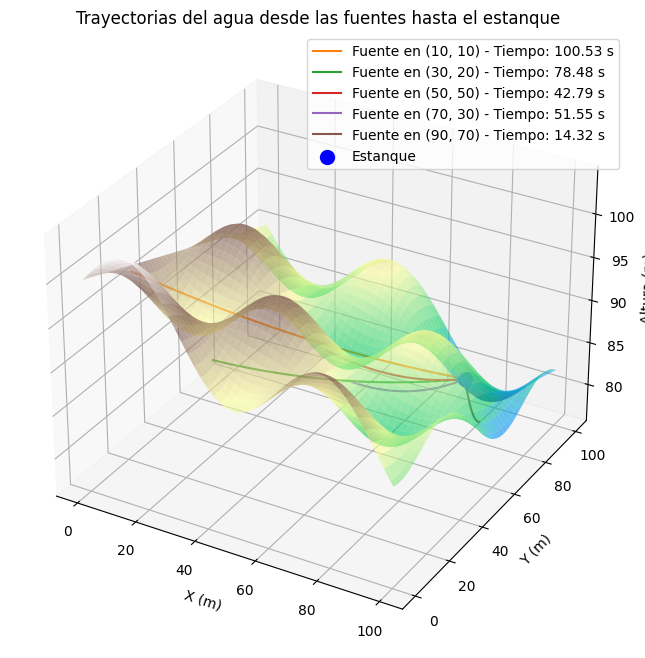

In [3]:
# Definición del terreno en 3D
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
x, y = np.meshgrid(x, y)
z = 100 - 0.1 * (x + y) + 5 * np.sin(0.1 * x) * np.cos(0.1 * y)

# Definición de las fuentes de captación de agua
fuentes = [
    (10, 10, z[10, 10]),
    (30, 20, z[30, 20]),
    (50, 50, z[50, 50]),
    (70, 30, z[70, 30]),
    (90, 70, z[90, 70])
]

# Definición del estanque
estanque_x, estanque_y = 80, 80
estanque_z = z[estanque_x, estanque_y]

# Parámetros de la simulación
velocidad_media = 1.0  # m/s

# Visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='terrain', alpha=0.6)

# Función para simular la trayectoria del agua y calcular el tiempo
def simular_trayectoria(fuente, estanque, velocidad):
    x0, y0, z0 = fuente
    xf, yf, zf = estanque
    t = np.linspace(0, 1, 100)
    xt = x0 + t * (xf - x0)
    yt = y0 + t * (yf - y0)
    zt = z0 + t * (zf - z0) - 5 * t * (1 - t)  # Ajuste parabólico para representar la caída
    distancia = np.sqrt((xf - x0)**2 + (yf - y0)**2 + (zf - z0)**2)
    tiempo = distancia / velocidad
    return xt, yt, zt, tiempo

# Simulación de las trayectorias y tiempos
for fuente in fuentes:
    xt, yt, zt, tiempo = simular_trayectoria(fuente, (estanque_x, estanque_y, estanque_z), velocidad_media)
    ax.plot(xt, yt, zt, label=f'Fuente en ({fuente[0]}, {fuente[1]}) - Tiempo: {tiempo:.2f} s')

# Añadir la posición del estanque
ax.scatter(estanque_x, estanque_y, estanque_z, color='blue', s=100, label='Estanque')

# Configuraciones del gráfico
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Altura (m)')
ax.set_title('Trayectorias del agua desde las fuentes hasta el estanque')
ax.legend()
plt.show()


###### Utilizando noise

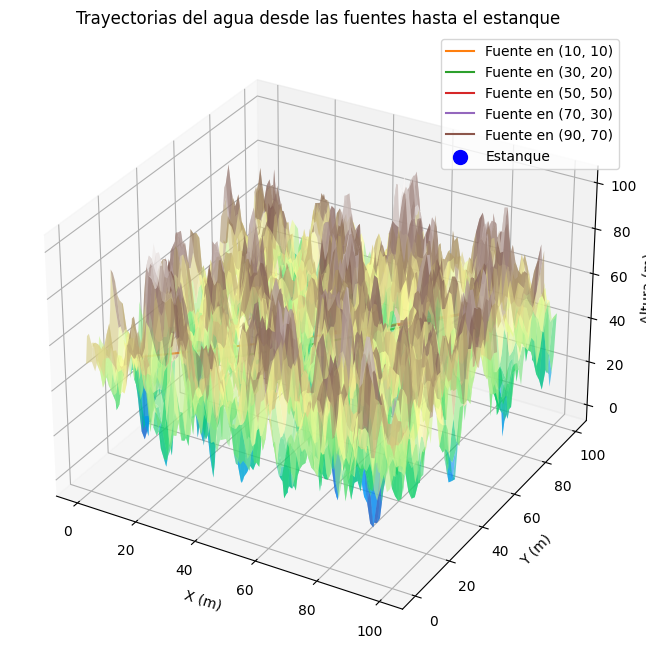

In [4]:
# Parámetros del terreno
size = 100
scale = 10.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

# Generación del terreno usando Perlin noise
x = np.linspace(0, size, size)
y = np.linspace(0, size, size)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)

for i in range(size):
    for j in range(size):
        z[i][j] = noise.pnoise2(i/scale, 
                                j/scale, 
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity, 
                                repeatx=size, 
                                repeaty=size, 
                                base=0)

# Normalización del terreno
z = (z - np.min(z)) / (np.max(z) - np.min(z)) * 100  # Escalando a 0-100 metros

# Definición de las fuentes de captación de agua
fuentes = [
    (10, 10, z[10, 10]),
    (30, 20, z[30, 20]),
    (50, 50, z[50, 50]),
    (70, 30, z[70, 30]),
    (90, 70, z[90, 70])
]

# Definición del estanque
estanque_x, estanque_y = 80, 80
estanque_z = z[estanque_x, estanque_y]

# Visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='terrain', alpha=0.6)

# Función para simular la trayectoria del agua
def simular_trayectoria(fuente, estanque):
    x0, y0, z0 = fuente
    xf, yf, zf = estanque
    t = np.linspace(0, 1, 100)
    xt = x0 + t * (xf - x0)
    yt = y0 + t * (yf - y0)
    zt = z0 + t * (zf - z0) - 5 * t * (1 - t)  # Ajuste parabólico para representar la caída
    return xt, yt, zt

# Simulación de las trayectorias
for fuente in fuentes:
    xt, yt, zt = simular_trayectoria(fuente, (estanque_x, estanque_y, estanque_z))
    ax.plot(xt, yt, zt, label=f'Fuente en ({fuente[0]}, {fuente[1]})')

# Añadir la posición del estanque
ax.scatter(estanque_x, estanque_y, estanque_z, color='blue', s=100, label='Estanque')

# Configuraciones del gráfico
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Altura (m)')
ax.set_title('Trayectorias del agua desde las fuentes hasta el estanque')
ax.legend()
plt.show()


###### Apendice artistico

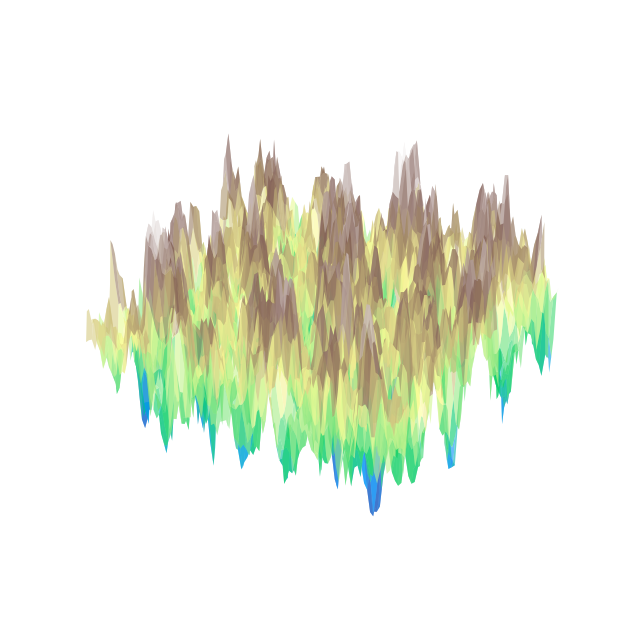

In [5]:
# Parámetros del terreno
size = 100
scale = 10.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

# Generación del terreno usando Perlin noise
x = np.linspace(0, size, size)
y = np.linspace(0, size, size)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)

for i in range(size):
    for j in range(size):
        z[i][j] = noise.pnoise2(i/scale, 
                                j/scale, 
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity, 
                                repeatx=size, 
                                repeaty=size, 
                                base=0)

# Normalización del terreno
z = (z - np.min(z)) / (np.max(z) - np.min(z)) * 100  # Escalando a 0-100 metros

# Visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='terrain', alpha=0.6)

# Configuraciones del gráfico
ax.set_axis_off()  # Quitar los ejes
ax.grid(False)  # Quitar la cuadrícula
plt.show()


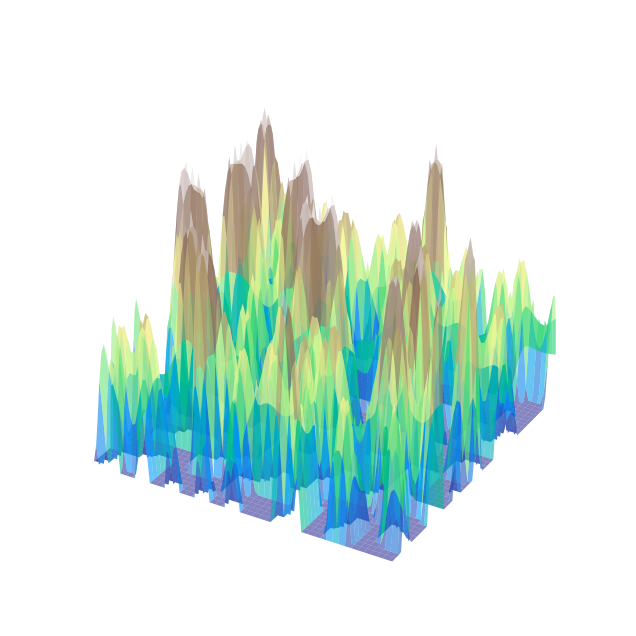

In [6]:
# Función para generar ruido Perlin
def perlin(x, y, seed=42):
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    xi, yi = x.astype(int) % 256, y.astype(int) % 256
    xf, yf = x - xi, y - yi
    u, v = fade(xf), fade(yf)
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)
    return lerp(x1, x2, v)

def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(a, b, x):
    return a + x * (b - a)

def gradient(h, x, y):
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[0] * x + g[1] * y

# Parámetros del terreno
size = 100
scale = 10.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

# Generación del terreno usando Perlin noise
x = np.linspace(0, size, size)
y = np.linspace(0, size, size)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)

for i in range(size):
    for j in range(size):
        z[i][j] = perlin(np.array([i/scale])[0], np.array([j/scale])[0])

# Normalización del terreno
z = (z - np.min(z)) / (np.max(z) - np.min(z)) * 100  # Escalando a 0-100 metros

# Restricción del terreno a alturas por encima del nivel del mar (50 metros)
sea_level = 50
z[z < sea_level] = sea_level

# Visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='terrain', alpha=0.6)

# Configuraciones del gráfico
ax.set_axis_off()  # Quitar los ejes
ax.grid(False)  # Quitar la cuadrícula
plt.show()
